In [121]:
import numpy as np
import matplotlib.pyplot as plt

In [131]:
focal_length_mm = np.linspace(5,50)
pixel_pitch_mm = 2.8e-3
sensor_width = 1945
baseline_mm = 100
obj_distance_mm = 2500
depth_resolution = -sensor_width * obj_distance_mm**2/(focal_length_mm * baseline_mm)   # as a function of just focal length
hfov = np.rad2deg(2 * np.arctan2(sensor_width * pixel_pitch_mm, 2 * focal_length_mm))

Our objective is to determine a scoring system to find the optimal focal length at which we get both the maximum possible depth resolution as well as the largest possible field of view. We do this by obtaining functions that score each aspect individually, and then we can multiply them together and obtain the maximum within our desired range of focal lengths.

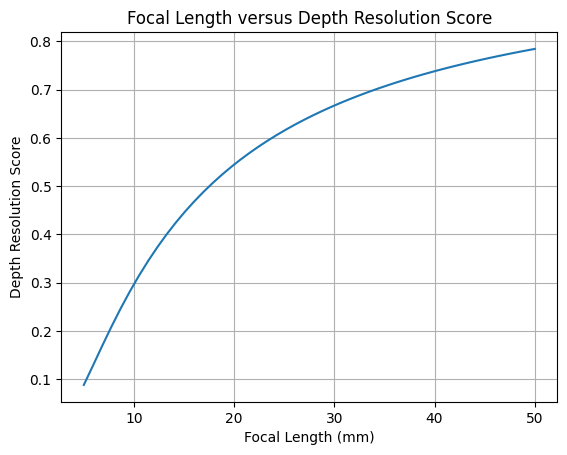

In [135]:
# higher focal length gives lower depth resolution => high focal lengths should be scored higher
depth_resolution_score = np.exp(depth_resolution/1e7)
plt.plot(focal_length_mm, depth_resolution_score)
plt.xlabel("Focal Length (mm)")
plt.ylabel("Depth Resolution Score")
plt.title(f"Focal Length versus Depth Resolution Score")
plt.grid()

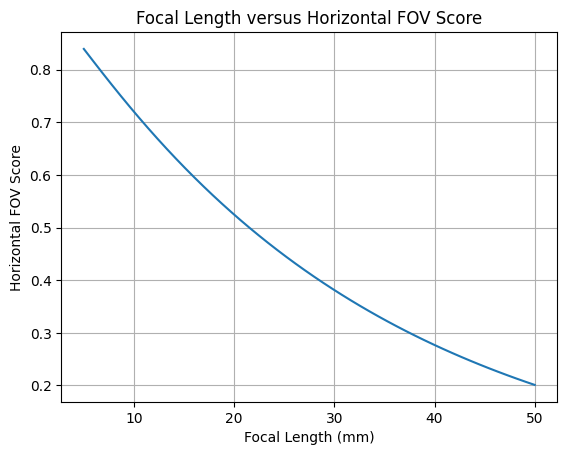

In [136]:
# higher focal length gives lower FOV => low focal lengths should be scored higher
hfov_score = np.exp(-10/hfov)
plt.plot(focal_length_mm, hfov_score)
plt.xlabel("Focal Length (mm)")
plt.ylabel("Horizontal FOV Score")
plt.title(f"Focal Length versus Horizontal FOV Score")
plt.grid()

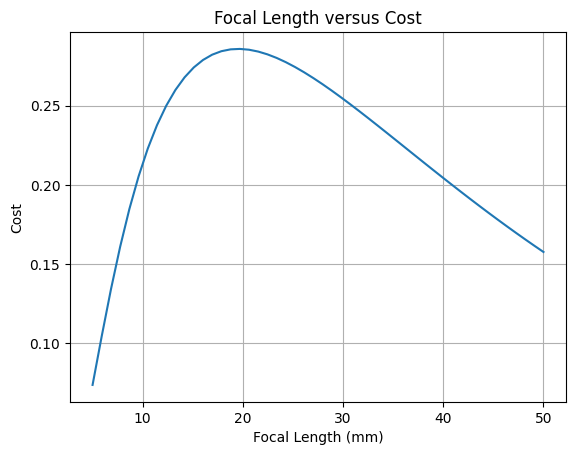

In [137]:
cost = depth_resolution_score * hfov_score
plt.plot(focal_length_mm, cost)
plt.xlabel("Focal Length (mm)")
plt.ylabel("Cost")
plt.title(f"Focal Length versus Cost")
plt.grid()